In [42]:
import json
from tqdm.notebook import tqdm
import psycopg2
import psycopg2.extras
from pprint import pprint
import datetime
from numpy import interp
from matplotlib import pyplot
import pandas as pd
import pandas.io.sql as sqlio
from pandas.plotting import scatter_matrix
from matplotlib.pyplot import figure

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import export_graphviz

In [9]:
conn = psycopg2.connect(user='postgres', database="postgres", password='password', host='localhost', port='5432')
sql = "SELECT * FROM music"
df = sqlio.read_sql_query(sql, conn)

# Data Analysis

In [10]:
print(df.shape)

(697510, 18)


In [12]:
df

,music_id,music_spotify_uri,name,duration_ms,popularity,danceability,energy,music_key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,like_rate
0,8040,spotify:track:0awxPw2WkYJVzcSKWvJZAh,Flesh & Bone,267677.0,45.0,0.631,0.534000,2.0,-6.783,0.0,0.0848,0.5050,0.000000,0.0770,0.824,145.808,4.0,NaN
1,8041,spotify:track:4ToSbnK7fD5vE9R5sgWPsy,Cleopatra,201413.0,0.0,0.536,0.762000,8.0,-6.749,1.0,0.0427,0.2700,0.000121,0.0957,0.430,151.353,4.0,NaN
2,8042,spotify:track:5GW2n1h3BNYnpU7lK23iKv,Gun Song,216546.0,0.0,0.695,0.705000,7.0,-5.493,1.0,0.0243,0.3140,0.000041,0.0943,0.290,96.287,4.0,NaN
3,8043,spotify:track:3M0pROlXyH0bzh9CNJhDOJ,Angela,201785.0,0.0,0.656,0.572000,4.0,-8.162,1.0,0.0319,0.6530,0.000179,0.1130,0.319,130.370,4.0,NaN
4,8044,spotify:track:1uGAMOMKqPPYxAllZ1PV4s,In The Light,231867.0,0.0,0.696,0.417000,9.0,-9.624,1.0,0.0270,0.8260,0.020600,0.1000,0.258,97.711,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697505,8035,spotify:track:3Z9Kaszz1KKOdWhP7Q8fVR,Thank You,7560.0,0.0,0.000,0.000278,5.0,-32.668,1.0,0.0000,0.0219,0.000921,0.0000,0.000,0.000,0.0,NaN
697506,8036,spotify:track:20FREPNcSl4TnZEt1GAYSB,Not That Simple - Kyle Tree Remix,207373.0,0.0,0.717,0.807000,8.0,-8.348,0.0,0.0632,0.0912,0.000000,0.1560,0.529,107.030,4.0,NaN
697507,8037,spotify:track:47uRsTBT1Jb93QSvY5C12O,Be As You Are - JordanXL Remix,203533.0,0.0,0.670,0.685000,2.0,-5.486,1.0,0.0510,0.0625,0.000000,0.2160,0.207,170.037,4.0,NaN
697508,8038,spotify:track:6vzhxMkDnTdRURQzqI1p0L,In The Arms Of A Stranger - Brian Kierulf Remix,207200.0,0.0,0.814,0.642000,0.0,-6.394,1.0,0.0951,0.1320,0.000011,0.0851,0.207,97.955,4.0,NaN


In [13]:
print(df.describe())

            music_id   duration_ms     popularity   danceability  \
count  697510.000000  6.975090e+05  697509.000000  696824.000000   
mean   348755.500000  2.359903e+05      13.232454       0.535011   
std    201353.937469  1.456706e+05      15.888642       0.189475   
min         1.000000  6.800000e+01       0.000000       0.000000   
25%    174378.250000  1.736930e+05       0.000000       0.402000   
50%    348755.500000  2.143860e+05       7.000000       0.553000   
75%    523132.750000  2.664260e+05      22.000000       0.679000   
max    697510.000000  1.046582e+07     100.000000       0.995000   

              energy      music_key       loudness           mode  \
count  696824.000000  696824.000000  696824.000000  696824.000000   
mean        0.527649       5.230093     -11.053942       0.621458   
std         0.284544       3.562322       6.987895       0.485024   
min         0.000000       0.000000     -60.000000       0.000000   
25%         0.285000       2.000000     -1

In [23]:
figure(figsize=(20, 6), dpi=80)

<Figure size 1600x480 with 0 Axes>

<Figure size 1600x480 with 0 Axes>

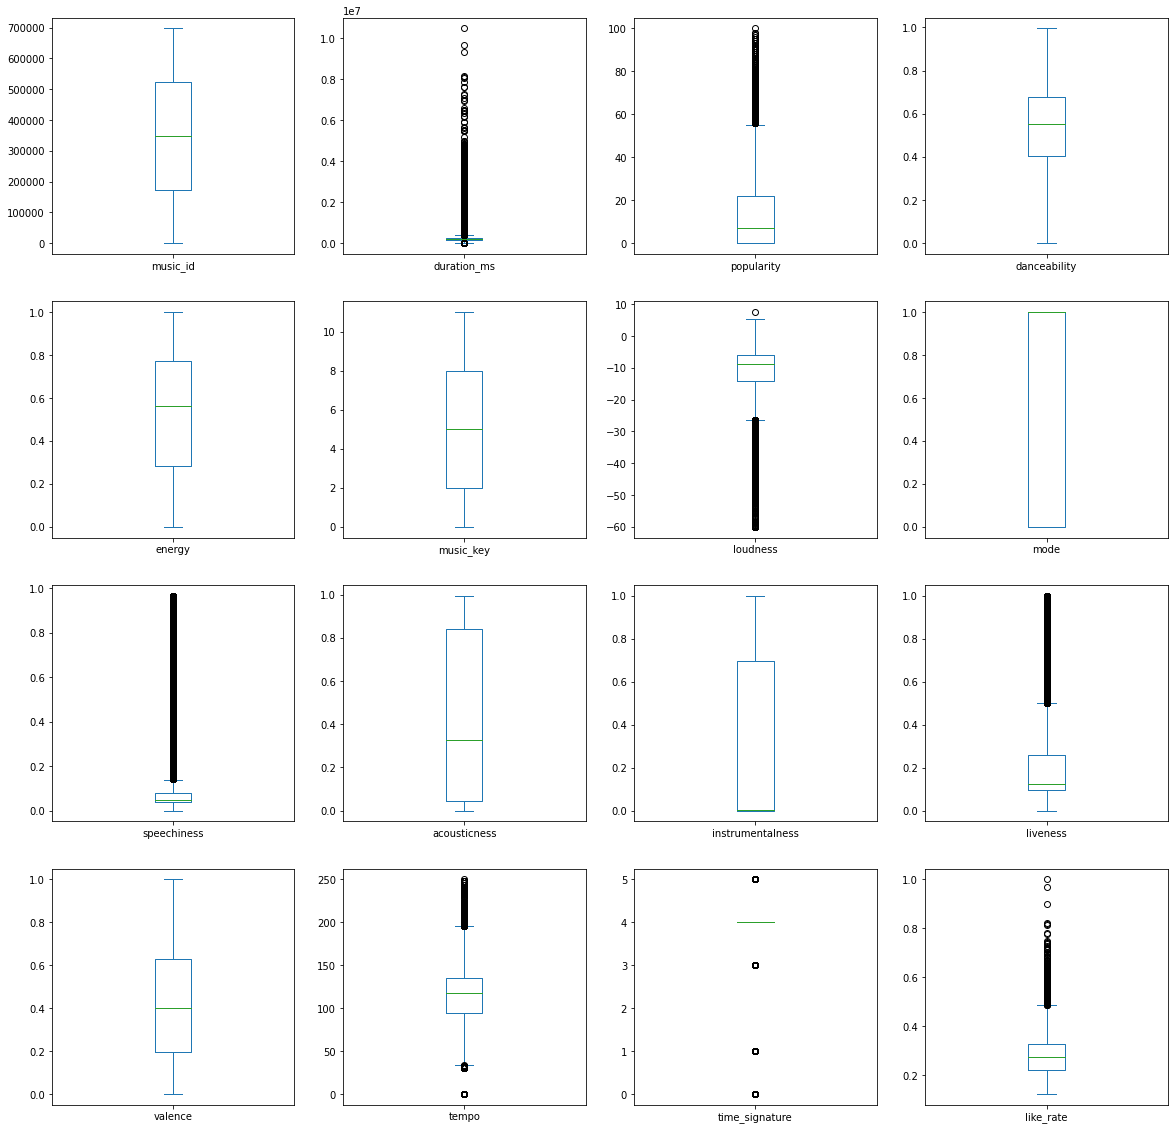

In [40]:
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,20))
pyplot.show()

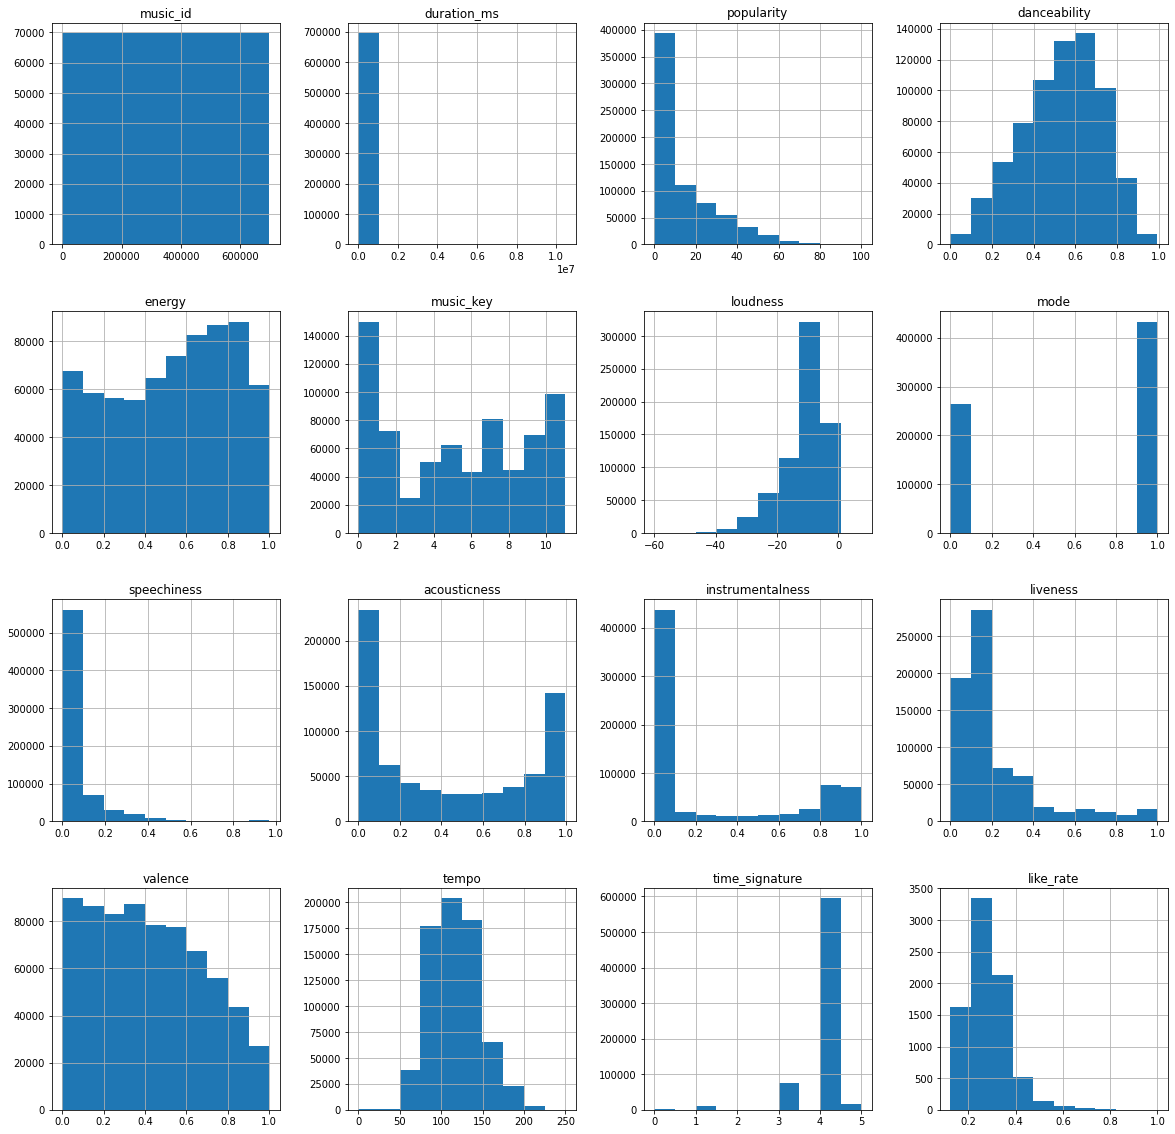

In [39]:
df.hist(figsize=(20,20))
pyplot.show()

# Music Suggestion

In [132]:
array = df_filtered.values
X = array[:,:-2]
y = array[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [139]:
df_filtered

,popularity,danceability,energy,music_key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,like_rate
688786,0.0,0.758,0.500,1.0,-6.810,0.4370,0.364000,0.000000,0.2220,0.6960,137.792,0.0
688787,0.0,0.548,0.879,11.0,-4.120,0.0478,0.019100,0.000052,0.4020,0.3900,117.979,0.0
688788,7.0,0.878,0.619,6.0,-5.560,0.1020,0.053300,0.000000,0.1130,0.6390,136.041,1.0
688789,45.0,0.676,0.175,7.0,-11.793,0.0409,0.972000,0.855000,0.1140,0.1410,84.685,1.0
688790,55.0,0.439,0.908,4.0,-4.080,0.0644,0.019600,0.005370,0.1370,0.3500,140.009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
697307,59.0,0.372,0.919,11.0,-1.680,0.3000,0.098700,0.000000,0.2340,0.4190,182.785,0.0
697308,73.0,0.804,0.323,0.0,-11.127,0.3050,0.308000,0.000000,0.1500,0.4560,87.019,1.0
697309,72.0,0.264,0.122,9.0,-15.399,0.0349,0.885000,0.349000,0.0940,0.0735,148.658,1.0
697310,66.0,0.452,0.873,9.0,-4.867,0.0613,0.000519,0.000000,0.0592,0.4330,80.473,0.0


In [134]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [135]:
dtc.score(X_test, y_test)

0.5741606459838504

In [140]:
dtc = DecisionTreeClassifier(criterion='entropy', max_features=10, random_state=42, max_leaf_nodes=150, max_depth=7, min_samples_split=100)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=10,
                       max_leaf_nodes=150, min_samples_split=100,
                       random_state=42)

In [141]:
dtc.score(X_test, y_test)

0.6374840628984275

In [142]:
# Use our decision tree classifier to create an ensemble, draw 0.8 samples from X to train each estimator
bag = BaggingClassifier(dtc, n_estimators=100, max_samples=0.8, random_state=42)
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=7,
                                                        max_features=10,
                                                        max_leaf_nodes=150,
                                                        min_samples_split=100,
                                                        random_state=42),
                  max_samples=0.8, n_estimators=100, random_state=42)

In [143]:
bag.score(X_test, y_test)

0.6604334891627709

# Let's try

In [155]:
df_filtered_try = df[df['like_rate'].isna()]
df_filtered_try_dropped = df_filtered_try.drop(columns=['music_id', 'music_spotify_uri', 'name', 'duration_ms', 'mode', 'time_signature'])

In [156]:
array = df_filtered_try_dropped.values
X = array[:,:-2]

In [171]:
predicted = bag.predict(X[0:500])
for index, value in enumerate(predicted):
    print(df_filtered_try.loc[index]['music_spotify_uri'] + ': ' + str(value))

spotify:track:0awxPw2WkYJVzcSKWvJZAh: 0.0
spotify:track:4ToSbnK7fD5vE9R5sgWPsy: 0.0
spotify:track:5GW2n1h3BNYnpU7lK23iKv: 0.0
spotify:track:3M0pROlXyH0bzh9CNJhDOJ: 0.0
spotify:track:1uGAMOMKqPPYxAllZ1PV4s: 0.0
spotify:track:4ORCdEPIKuvJzegSSCrjQk: 0.0
spotify:track:0XiPojuM89Ox9F6OrQdeoJ: 0.0
spotify:track:1tHBYwDdPOE9BMPlMGoZIj: 0.0
spotify:track:7bhMycC0HMb6j652sblsKT: 0.0
spotify:track:01Q7stNowjtgqKSDK3MQHp: 0.0
spotify:track:4f7vxUNrB9BfsehXcJOiAc: 0.0
spotify:track:3KR5puUARG8vkKMtSCSn2n: 0.0
spotify:track:3VCGlrriSCQIAM9sXOIJOD: 0.0
spotify:track:2d7hyVntSlgXlyEZaWHvcB: 0.0
spotify:track:30fn2FXuh48yeWEqO4XeMt: 0.0
spotify:track:1Syx6JhcFKvbMVWLjFzUCQ: 0.0
spotify:track:4vug3wR43u0AhRH9D8Lp8t: 0.0
spotify:track:3Vj9SYcisXn7qmLrDe75k1: 0.0
spotify:track:6sSu6bHOIEe48kU7R3xj34: 0.0
spotify:track:3EVmPGTfyNycp7GKWTO16j: 0.0
spotify:track:2NxX2IORexAjAvuhHZw52u: 0.0
spotify:track:3Z0YN50RzRtmYre1bRG8H6: 0.0
spotify:track:3gd9jFyf2AhJPi1HqHUVFP: 0.0
spotify:track:1UKMN7B6qjo2JsQybKzv

In [170]:
df_filtered_try.loc[10]

music_id                                             8050
music_spotify_uri    spotify:track:4f7vxUNrB9BfsehXcJOiAc
name                                             Hangover
duration_ms                                      217626.0
popularity                                            0.0
danceability                                        0.725
energy                                              0.582
music_key                                             2.0
loudness                                           -7.311
mode                                                  0.0
speechiness                                        0.0545
acousticness                                        0.171
instrumentalness                                 0.000003
liveness                                           0.0827
valence                                             0.651
tempo                                              96.876
time_signature                                        4.0
like_rate     